In [1]:
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

#OriginalData = pd.read_csv ("olympicsall2.csv")

#OringalData has erranous values that cannnot be read with utf-8 and still gave me problems when I tried ISO encoding
## The olympicsall2.csv is a combination of two CVSs, one for summer and one for winter information
###I split the summer and winter data into two csvs manually and found that the winter data had the errors in it
#### Errors were missing values for countries, so I erased them quickly by sorting excel sheet by alphabetical order
#### Also deleted the rows for "liechtenstein" as this country info gave me problems when I attempted to sort data

Summer_Data = pd.read_csv ("Summer_Only.csv")
Winter_Data = pd.read_csv ("Winter_Only.csv")
SW_Merge = Summer_Data.append(Winter_Data)
SW_Merge.to_csv("Final_SW", encoding="utf-8", index=False)

All = pd.read_csv("Final_SW")

In [2]:
#countries with the most medals
Medal_count = All["Country"].value_counts()
Medal_count.nlargest(10)

United States     5238
United Kingdom    1799
Germany           1665
France            1548
Italy             1488
Sweden            1477
Canada            1274
Australia         1204
Hungary           1091
Russia            1031
Name: Country, dtype: int64

In [3]:
#Season analysis by year
Season_analysis = pd.DataFrame( {"Medal Count":All.groupby(['Country', 'Season']).size()} ).reset_index()
summer = Season_analysis[Season_analysis["Season"] == "Summer"]
winter = Season_analysis[Season_analysis["Season"] == "Winter"]
Season_analysis.head(3)

,Country,Season,Medal Count
0,Afghanistan,Summer,2
1,Algeria,Summer,15
2,Argentina,Summer,259


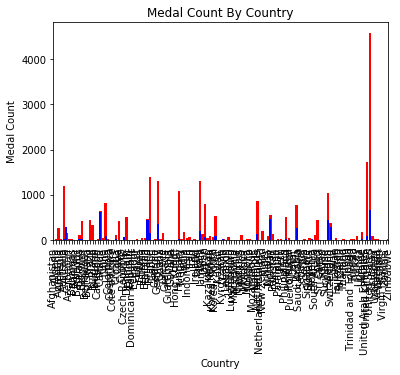

In [4]:
#create bar graph that overlays Summer and Winter
summer = Season_analysis[Season_analysis["Season"] == "Summer"]
winter = Season_analysis[Season_analysis["Season"] == "Winter"]

plt.bar(summer['Country'], summer['Medal Count'], color='red', edgecolor="red", width=0.9)
plt.bar(winter["Country"], winter['Medal Count'], color='blue', edgecolor="blue")

plt.xlim(2, len('Country'), 2)

plt.title("Medal Count By Country")
plt.ylabel("Medal Count")
plt.xlabel("Country")

plt.xticks(summer['Country'], rotation="vertical")
plt.figure(figsize=(50,10))

#Legend
#plt.legend(handles=[summer, winter], loc="best")
### Just kidding, Legend does not want to cooperate 

# plt.tight_layout()
# plt.savefig("SummerVWinter.png")
plt.show()

#I attempted to increase length of graph to make the graph more visable by changing figsize, but nothing worked

In [5]:
# Because I couldnt fix the above graph, I decided it may be interesting to observe the trends of countried who earned 
## the top 10 amount of summer medals and top 10 winter medals 

In [6]:
#Top 10 Countries who have won the most Summer Olympic Medals
summerTen = Summer_Data["Country"].value_counts()
# tried to drop values with"SummerFinal = Country[Country['Value'] > 806"
##but  counting function does not provide country name so I saved the csv with only medal count and manually added names

summerTen.to_csv("SummerCount", encoding="utf-8", index=False)
summerTen.head(10)

United States     4585
United Kingdom    1720
France            1396
Germany           1305
Italy             1296
Australia         1189
Hungary           1079
Sweden            1044
Netherlands        851
China              807
Name: Country, dtype: int64

In [7]:
Summer_Ten = pd.read_csv ("SummerCount.csv")

In [8]:
#Top 10 Countries who have won the most Summer Olympic Medals

winterTen = Winter_Data["Country"].value_counts()
summerTen.to_csv("WinterCount", encoding="utf-8", index=False)
winterTen.head(10)

United States    653
Canada           625
Norway           457
Finland          434
Sweden           433
Germany          360
Switzerland      285
Austria          280
Russia           263
Italy            192
Name: Country, dtype: int64

In [9]:
Winter_Ten = pd.read_csv ("WinterCount.csv")

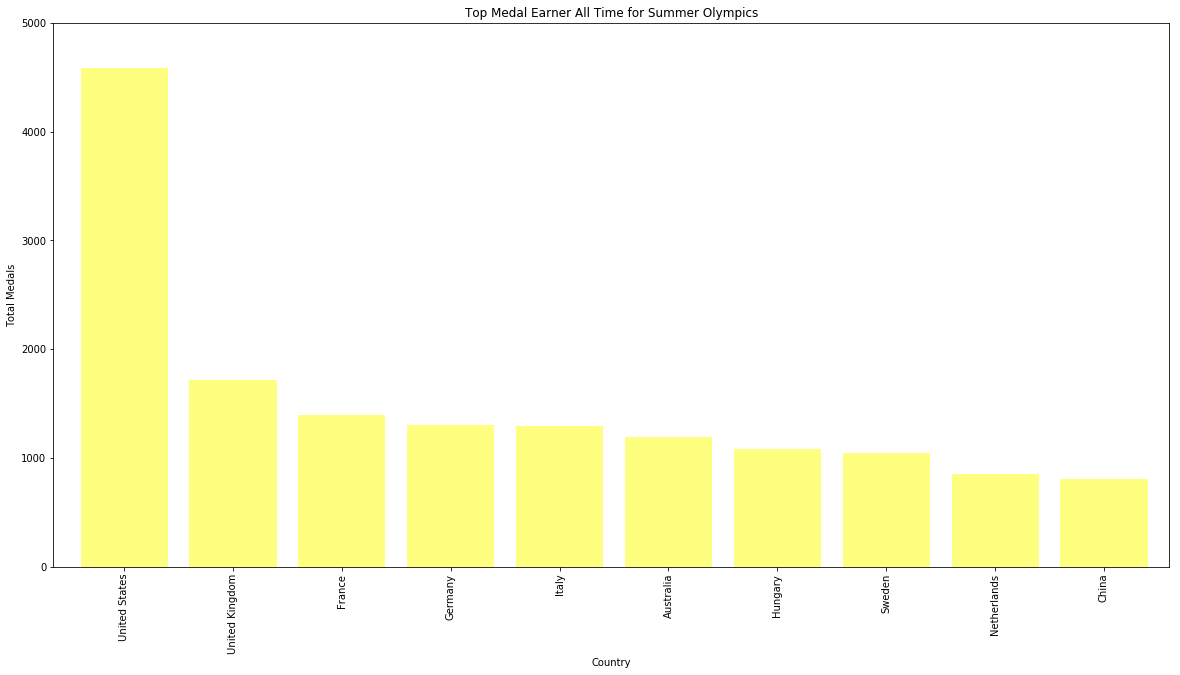

In [10]:
# Bar Graphs of Top 10 Countries who have won the most Summer Olympic Medals

x_axis1 = np.arange(len(Summer_Ten))
plt.figure(figsize=(20,10))
tick_locations1 = [value+0.4 for value in x_axis1]
plt.bar(x_axis1, Summer_Ten["Medals"], color='yellow', alpha=0.5, align="edge")


plt.xticks(tick_locations1, Summer_Ten["Country"], rotation="vertical")

plt.xlim(-0.25, len(x_axis1))
plt.ylim(0, 5000)
plt.title("Top Medal Earner All Time for Summer Olympics")
plt.xlabel("Country")
plt.ylabel("Total Medals")

plt.savefig("TopSummer.png")
plt.show()

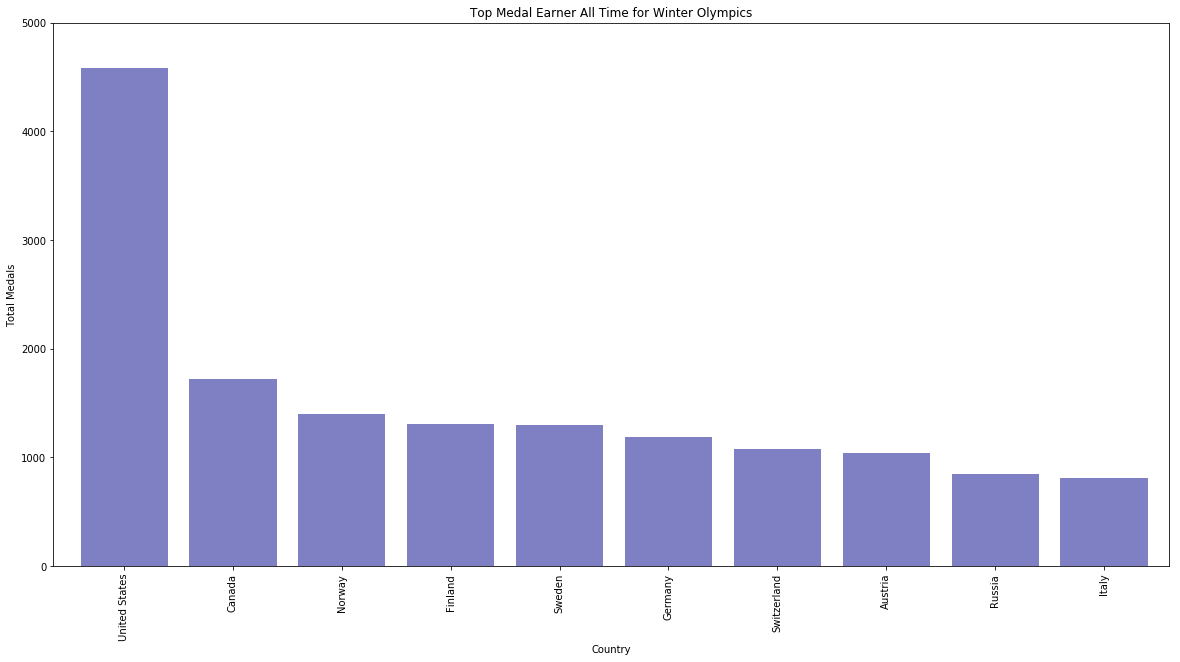

In [11]:
# Bar Graphs of Top 10 Countries who have won the most Winter Olympic Medals

x_axis2 = np.arange(len(Winter_Ten))
plt.figure(figsize=(20,10))
tick_locations2 = [value+0.4 for value in x_axis2]
plt.xticks(tick_locations2, Winter_Ten["Country"], rotation="vertical")
plt.bar(x_axis2, Winter_Ten["Medals"], color='darkblue', alpha=0.5, align="edge")

plt.xlim(-0.25, len(x_axis2))
plt.ylim(0, 5000)
plt.title("Top Medal Earner All Time for Winter Olympics")
plt.xlabel("Country")
plt.ylabel("Total Medals")

plt.savefig("TopWinter.png")
plt.show()

In [12]:
#### Attempted to learn Cartopy to see if I could learn to utilize it in time for the project deadline
#### Thought it might take too learn and created a map using mapchart.net 

#Png uploaded to Git as "TopTen.png"
![title](TopTen.png)

/bin/sh: -c: line 0: syntax error near unexpected token `TopTen.png'
/bin/sh: -c: line 0: `[title](TopTen.png)'
